# sync intern task 2

**real time face mask detection**




**name- vivek popat shedge**

In [1]:
import cv2
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import os
print(os.listdir("D:\data"))

['with_mask', 'without_mask']


In [10]:
# Reading dataset
import pandas as pd
import cv2
import numpy as np
# mushroom_info = pd.read_json('../input/mushroom/mushroom_imgs.json', lines=True)
# print(mushroom_info)

def get_images():
    images = []
    i = 0
    folder = 'D:/data/with_mask'
    for filename in os.listdir(folder):
        i = i + 1
        if i > 500:
            break
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append({'img': img, 'label': 1})
    
    folder = 'D:/data/without_mask'
    i = 0
    for filename in os.listdir(folder):
        i = i + 1
        if i > 500:
            break
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append({'img': img, 'label': 0})
    return images
#     img_dict = {}
#     for i, path in enumerate(mushroom_info['file_path']):
#         img_dict[i] = cv2.imread('../input/mushroom/'+path, -1)
#     return img_dict
# Reading images from the dataset and saving them in a dictionary
img_dict = get_images() 
print(img_dict[0])

{'img': array([[[ 18,  45,  72],
        [ 69,  96, 122],
        [106, 133, 159],
        ...,
        [ 47,  65,  72],
        [ 49,  65,  72],
        [ 42,  58,  65]],

       [[ 28,  53,  79],
        [ 45,  71,  95],
        [ 66,  92, 116],
        ...,
        [ 41,  59,  66],
        [ 44,  60,  67],
        [ 44,  60,  67]],

       [[ 29,  53,  75],
        [ 16,  41,  61],
        [ 14,  39,  59],
        ...,
        [ 39,  55,  62],
        [ 45,  59,  65],
        [ 54,  68,  74]],

       ...,

       [[ 32,  54,  65],
        [ 38,  62,  74],
        [ 52,  76,  96],
        ...,
        [132, 169, 197],
        [130, 167, 195],
        [127, 166, 194]],

       [[ 16,  36,  41],
        [ 22,  43,  51],
        [ 24,  43,  58],
        ...,
        [127, 166, 194],
        [125, 164, 192],
        [123, 162, 190]],

       [[ 27,  45,  46],
        [ 18,  37,  42],
        [  6,  22,  34],
        ...,
        [123, 163, 192],
        [122, 162, 191],
        [121, 16

In [11]:
def resize(img):
    desired_size = 320

    old_size = img.shape[:2]  
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    img = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_img

In [12]:
for i in range(0, len(img_dict)):
    img_dict[i]['img'] = resize(img_dict[i]['img'])

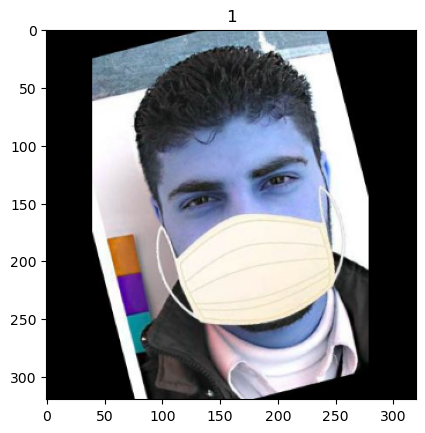

In [13]:
import matplotlib.pyplot as plt
def print_image(index):
    label = img_dict[index]['label']
    im = img_dict[index]['img']
    plt.imshow(im)
    plt.title(label)
    plt.show()
    
print_image(100)

In [14]:
labels = []
for i in range(0, len(img_dict)):
    labels.append(img_dict[i]['label'])
labels = np.array(labels)
labels = 1*labels
X = []
y = []
for i in range(len(labels)):
    y.append(labels[i])
    X.append(img_dict[i]['img'])

X = np.stack(X)
y = pd.Series(y)
print(y)

# Now X has all the image matrices, and y has all the labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int32


In [15]:
# Flatten images to pass into the ELM
flat = X.flatten().reshape(1000,307200)

In [16]:
def activation(x):
    return x * (x>0)#1 / (1 + np.exp(-x))

def MPInverse(h):
    return np.linalg.pinv(h)

no_of_features = 307200
no_of_hidden_nodes1 = 200
no_of_output = 1

input_data = flat

output = y
np.random.seed(2018)
base_bias = 2* np.random.random((1, no_of_hidden_nodes1)) -1
weight01 = 2 * np.random.random((no_of_features, no_of_hidden_nodes1)) - 1


input_layer = input_data
bias = np.array([base_bias[0],]*input_data.shape[0])
H = activation(np.dot(input_layer, weight01) + bias)
B = np.dot(MPInverse(H),output)
print("Model Trained")

Model Trained


In [17]:
# images = []
# ground_truth = np.loadtxt("../input/mushroom/test_img/gt.txt")
# for file in sorted(os.listdir('../input/mushroom/test_img')):
#     if file.endswith('.jpg'):
#         print(file)
#         img = cv2.imread('../input/mushroom/test_img/'+file,-1)
#         if img is not None:
#             images.append(img)

# print("Ground truth")
# print(ground_truth)

In [18]:
def print_image2(img,prediction,actual):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    title = "P(mask)= " + str(prediction) + " Actual = " + str(actual)
    plt.title(title)
    plt.show()

In [19]:
def predict(test_input,g_t):
    test_img = test_input.flatten().reshape(1,307200)
    bias_test = np.array([base_bias[0],]*test_img.shape[0])
    
    H_test = activation(np.dot(test_img, weight01) + bias_test)
    T_test = activation(np.dot(H_test,B))
    
    print_image2(test_input,T_test,g_t)

In [20]:
df = pd.DataFrame(img_dict)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
print(test)

                                                   img  label
521  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
737  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
740  [[[2, 2, 2], [2, 2, 2], [2, 2, 2], [1, 1, 1], ...      0
660  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
411  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
..                                                 ...    ...
408  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
332  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
208  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1
613  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
78   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      1

[200 rows x 2 columns]
